<a href="https://colab.research.google.com/github/caiohc28/cp4-ia/blob/main/cp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTACAO**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from pandas.plotting import autocorrelation_plot
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# **EXERCICIO 1**



In [ ]:
df = pd.read_csv(
    "household_power_consumption.txt",
    sep=";",
    na_values="?",
    low_memory=False
)

# Convertendo tipos numéricos
cols_num = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity',
            'Sub_metering_1','Sub_metering_2','Sub_metering_3']
df[cols_num] = df[cols_num].astype(float)

print(df.head(10))


         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   
5  16/12/2006  17:29:00                3.520                  0.522   235.02   
6  16/12/2006  17:30:00                3.702                  0.520   235.09   
7  16/12/2006  17:31:00                3.700                  0.520   235.22   
8  16/12/2006  17:32:00                3.668                  0.510   233.99   
9  16/12/2006  17:33:00                3.662                  0.510   233.86   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1

# **EXERCICIO 2**

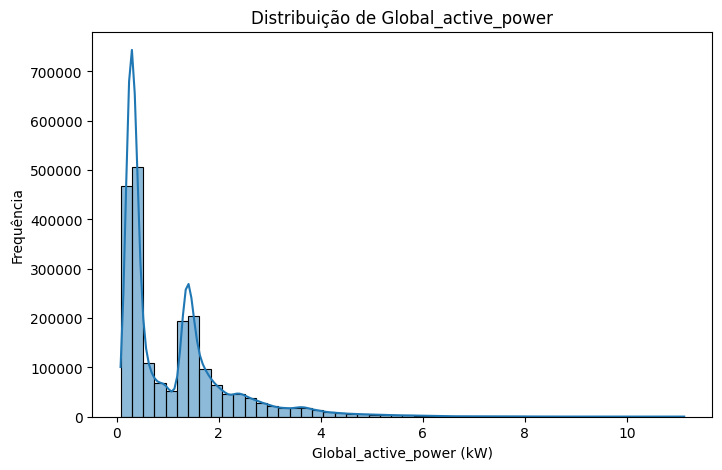

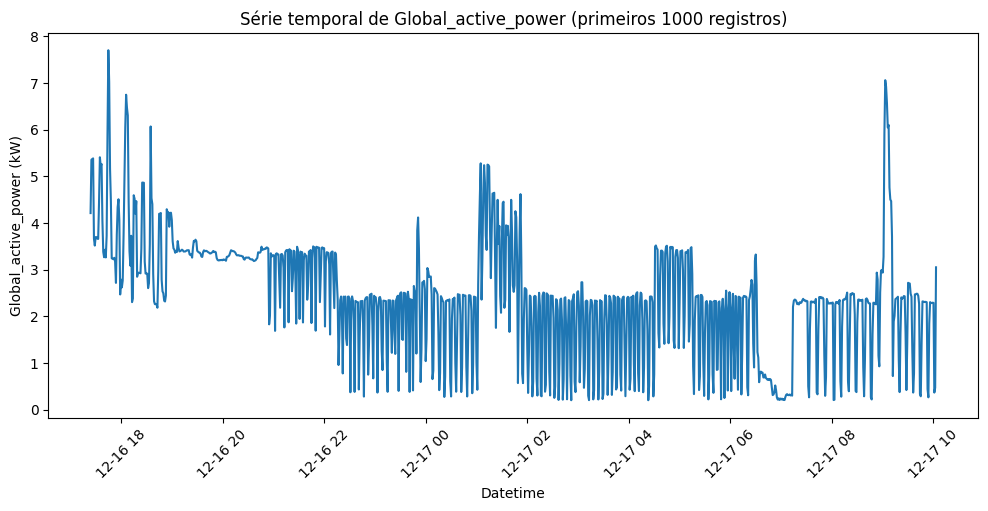

In [ ]:
df = pd.read_csv('/content/household_power_consumption.txt', sep=';', na_values='?', low_memory=False)

df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
plt.figure(figsize=(8,5))
sns.histplot(df['Global_active_power'].dropna(), bins=50, kde=True)
plt.title("Distribuição de Global_active_power")
plt.xlabel("Global_active_power (kW)")
plt.ylabel("Frequência")
plt.show()
plt.figure(figsize=(12,5))
plt.plot(df['Datetime'][:1000], df['Global_active_power'][:1000])
plt.title("Série temporal de Global_active_power (primeiros 1000 registros)")
plt.xlabel("Datetime")
plt.ylabel("Global_active_power (kW)")
plt.xticks(rotation=45)
plt.show()

O consumo (Global_active_power) tende a se concentrar em valores baixos, com a maioria das medições abaixo de 2 kW.

Existem picos esparsos de consumo mais alto, mas são menos frequentes.

# **EXERCICIO 3**

In [ ]:
print(df.isna().sum())


Date                        0
Time                        0
Global_active_power      4137
Global_reactive_power    4137
Voltage                  4137
Global_intensity         4137
Sub_metering_1           4137
Sub_metering_2           4138
Sub_metering_3           4138
dtype: int64


# **EXERCICIO 4**

In [ ]:
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df["Day_of_week"] = df["Date"].dt.day_name()
print(df[["Date","Day_of_week"]].head())


        Date Day_of_week
0 2006-12-16    Saturday
1 2006-12-16    Saturday
2 2006-12-16    Saturday
3 2006-12-16    Saturday
4 2006-12-16    Saturday


# **EXERCICIO 5**

In [ ]:
df_2007 = df[df["Date"].dt.year == 2007]
media_diaria = df_2007.groupby("Date")["Global_active_power"].mean()
print(media_diaria.head())


Date
2007-01-01    1.909031
2007-01-02    0.881414
2007-01-03    0.704204
2007-01-04    2.263481
2007-01-05    1.884281
Name: Global_active_power, dtype: float64


# **EXERCICIO 6**

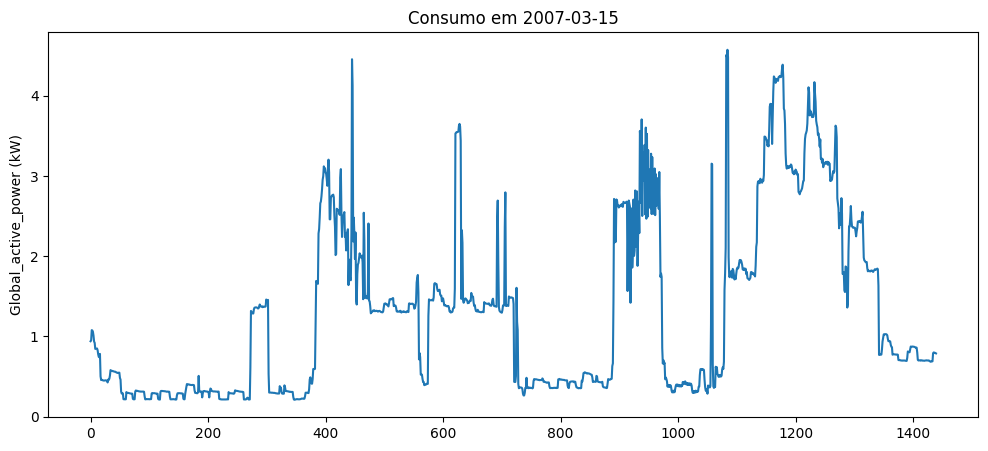

In [ ]:
dia = "2007-03-15"
df_dia = df[df["Date"] == dia]
plt.figure(figsize=(12,5))
plt.plot(df_dia["Global_active_power"].reset_index(drop=True))
plt.title(f"Consumo em {dia}")
plt.ylabel("Global_active_power (kW)")
plt.show()


# **EXERCICIO 7**

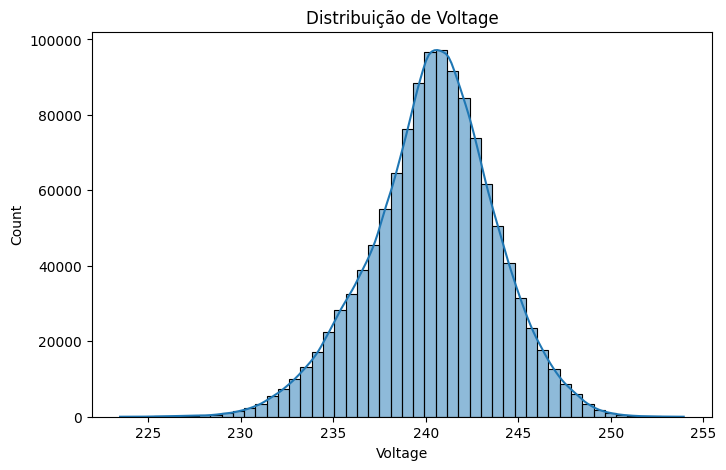

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Voltage"].dropna(), bins=50, kde=True)
plt.title("Distribuição de Voltage")
plt.show()


# **EXERCICIO 8**

In [ ]:
df["YearMonth"] = df["Date"].dt.to_period("M")
media_mes = df.groupby("YearMonth")["Global_active_power"].mean()
print(media_mes.head())


YearMonth
2006-12    1.901295
2007-01    1.546034
2007-02    1.401084
2007-03    1.318627
2007-04    0.891189
Freq: M, Name: Global_active_power, dtype: float64


# **EXERCICIO 9**

In [ ]:
consumo_dia = df.groupby("Date")["Global_active_power"].sum()
maior = consumo_dia.idxmax(), consumo_dia.max()
print("Dia de maior consumo:", maior)


Dia de maior consumo: (Timestamp('2006-12-23 00:00:00'), 4773.386)


# **EXERCICIO 10**

In [ ]:
df["Weekend"] = df["Day_of_week"].isin(["Saturday","Sunday"])
media_semana = df.groupby("Weekend")["Global_active_power"].mean()
print(media_semana)


Weekend
False    1.059999
True     1.312718
Name: Global_active_power, dtype: float64


# **Exercicio 11**

In [ ]:
print(df[["Global_active_power","Global_reactive_power","Voltage","Global_intensity"]].corr())


                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.258816 -0.387912   
Global_reactive_power             0.258816               1.000000 -0.138235   
Voltage                          -0.387912              -0.138235  1.000000   
Global_intensity                  0.999017               0.275651 -0.399413   

                       Global_intensity  
Global_active_power            0.999017  
Global_reactive_power          0.275651  
Voltage                       -0.399413  
Global_intensity               1.000000  


# **Exercicio 12**

In [ ]:
df["Total_Sub_metering"] = df["Sub_metering_1"] + df["Sub_metering_2"] + df["Sub_metering_3"]


# **Exercicio 13**


In [ ]:
media_global = df["Global_active_power"].mean()
df["YearMonth"] = df["Date"].dt.to_period("M")
comparacao = df.groupby("YearMonth")["Total_Sub_metering"].mean() > media_global
print(comparacao[comparacao])


YearMonth
2006-12    True
2007-01    True
2007-02    True
2007-03    True
2007-04    True
2007-05    True
2007-06    True
2007-07    True
2007-08    True
2007-09    True
2007-10    True
2007-11    True
2007-12    True
2008-01    True
2008-02    True
2008-03    True
2008-04    True
2008-05    True
2008-06    True
2008-07    True
2008-08    True
2008-09    True
2008-10    True
2008-11    True
2008-12    True
2009-01    True
2009-02    True
2009-03    True
2009-04    True
Freq: M, Name: Total_Sub_metering, dtype: bool


# **Exercicio 14**

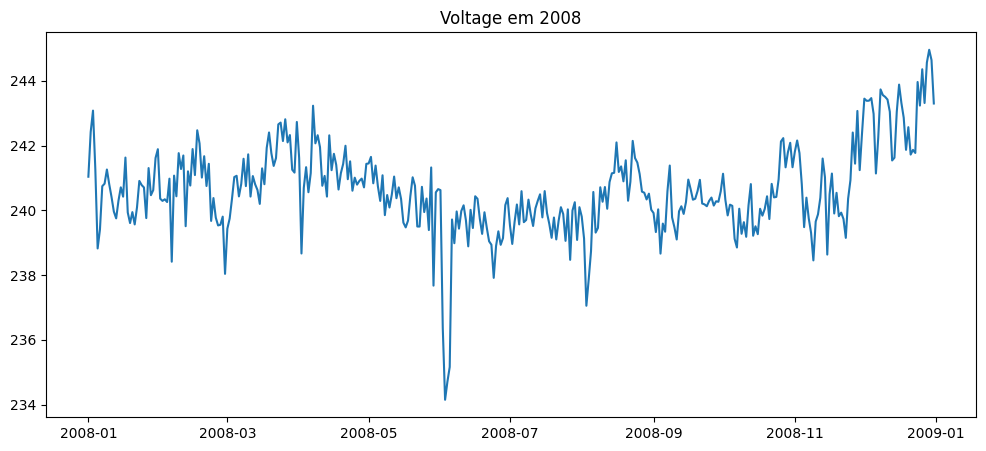

In [ ]:
df_2008 = df[df["Date"].dt.year == 2008]
plt.figure(figsize=(12,5))
plt.plot(df_2008.groupby("Date")["Voltage"].mean())
plt.title("Voltage em 2008")
plt.show()


# **Exercicio 15**

In [ ]:
df["Month"] = df["Date"].dt.month
verao = df[df["Month"].isin([6,7,8])]
inverno = df[df["Month"].isin([12,1,2])]
print("Média verão:", verao["Global_active_power"].mean())
print("Média inverno:", inverno["Global_active_power"].mean())


Média verão: 0.7185643849689717
Média inverno: 1.4272117176082533


# **Exercicio 16**

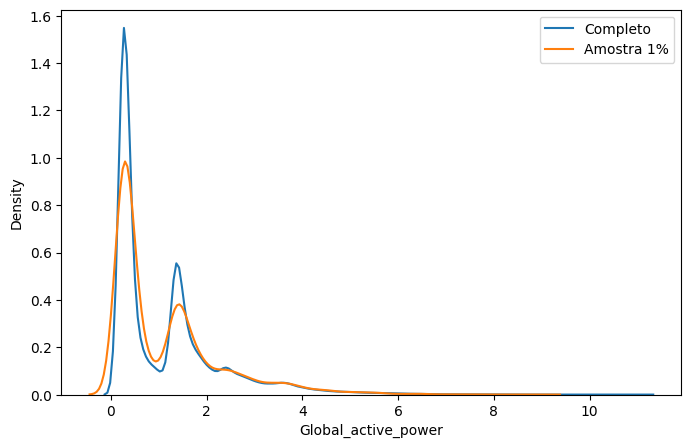

In [ ]:
sample = df.sample(frac=0.01, random_state=42)
plt.figure(figsize=(8,5))
sns.kdeplot(df["Global_active_power"].dropna(), label="Completo")
sns.kdeplot(sample["Global_active_power"].dropna(), label="Amostra 1%")
plt.legend()
plt.show()


# **Exercicio 17**



In [ ]:
scaler = MinMaxScaler()
df_norm = df[cols_num].dropna()
df_norm_scaled = pd.DataFrame(scaler.fit_transform(df_norm), columns=cols_num)
print(df_norm_scaled.head())


   Global_active_power  Global_reactive_power   Voltage  Global_intensity  \
0             0.374796               0.300719  0.372742          0.377593   
1             0.478363               0.313669  0.333005          0.473029   
2             0.479631               0.358273  0.321839          0.473029   
3             0.480898               0.361151  0.336617          0.473029   
4             0.325005               0.379856  0.400328          0.323651   

   Sub_metering_1  Sub_metering_2  Sub_metering_3  
0             0.0        0.012821        0.548387  
1             0.0        0.012821        0.516129  
2             0.0        0.025641        0.548387  
3             0.0        0.012821        0.548387  
4             0.0        0.012821        0.548387  


# **Exercicio 18**

In [ ]:
df_dias = df.groupby("Date")["Global_active_power"].mean().dropna().to_frame()
kmeans = KMeans(n_clusters=3, random_state=42)
df_dias["Cluster"] = kmeans.fit_predict(df_dias)
print(df_dias.head())


            Global_active_power  Cluster
Date                                    
2006-12-16             3.053475        1
2006-12-17             2.354486        1
2006-12-18             1.530435        2
2006-12-19             1.157079        2
2006-12-20             1.545658        2


# **Exercicio 19**

/tmp/ipython-input-51024514.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  seis_meses = seis_meses.fillna(method="ffill")


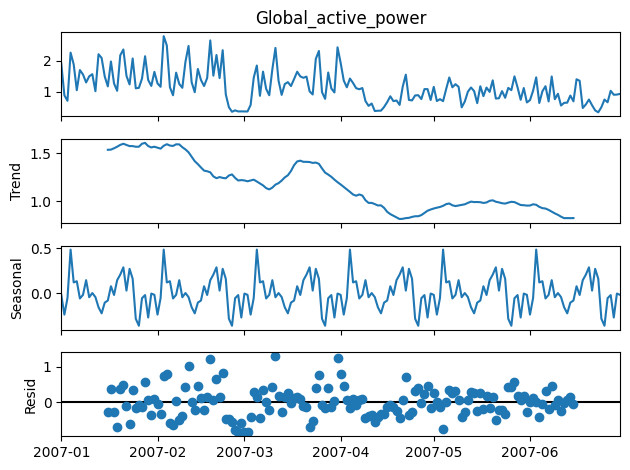

In [ ]:
df["Datetime"] = pd.to_datetime(df["Date"].astype(str) + " " + df["Time"], errors="coerce")
df = df.set_index("Datetime")
serie = df["Global_active_power"].resample("D").mean()
seis_meses = serie["2007-01":"2007-06"]
seis_meses = seis_meses.fillna(method="ffill")
decomp = seasonal_decompose(seis_meses, model="additive", period=30)
decomp.plot()
plt.show()


# **Exercicio 20**

In [ ]:
X = df[["Global_intensity"]].dropna()
y = df["Global_active_power"].dropna()

linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)

erro = np.mean((y - y_pred)**2)**0.5
print("RMSE:", erro)


RMSE: 0.04997520104903535


# **Exercicio 21**


In [ ]:
df["Datetime"] = pd.to_datetime(df["Date"].astype(str) + " " + df["Time"], errors="coerce")
df = df.set_index("Datetime")
serie_hora = df["Global_active_power"].resample("H").mean()
consumo_por_hora = serie_hora.groupby(serie_hora.index.hour).mean()
print(consumo_por_hora.sort_values(ascending=False).head())


Datetime
20    2.027253
21    1.992448
19    1.865749
7     1.530086
8     1.508789
Name: Global_active_power, dtype: float64


/tmp/ipython-input-2542678486.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  serie_hora = df["Global_active_power"].resample("H").mean()


# **Exercicio 22**


/tmp/ipython-input-2723013596.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  serie_hora = df["Global_active_power"].resample("H").mean().dropna()


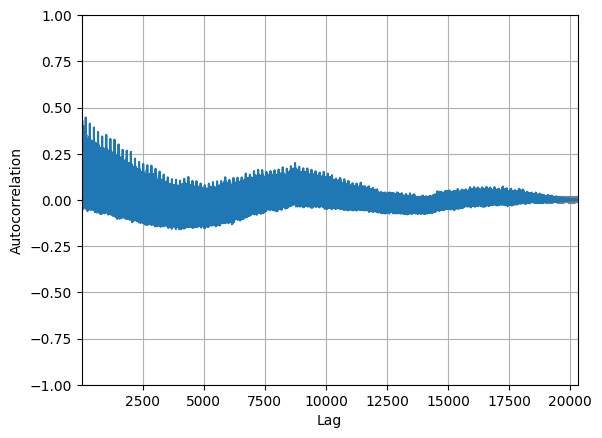

Autocorrelação 1h: 0.7231528861334233
Autocorrelação 24h: 0.43024538645867527
Autocorrelação 48h: 0.38946722460787664


In [ ]:
serie_hora = df["Global_active_power"].resample("H").mean().dropna()

# Autocorrelação com pandas (plot visual)
autocorrelation_plot(serie_hora)
plt.show()

# Calcular autocorrelação em lags específicos
corr_1h = serie_hora.autocorr(lag=1)
corr_24h = serie_hora.autocorr(lag=24)
corr_48h = serie_hora.autocorr(lag=48)

print("Autocorrelação 1h:", corr_1h)
print("Autocorrelação 24h:", corr_24h)
print("Autocorrelação 48h:", corr_48h)

A maior parte dos registros está concentrada em valores baixos.

# **Exercicio 23**

In [ ]:
X = df[["Global_active_power","Global_reactive_power","Voltage","Global_intensity"]].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Variância explicada:", pca.explained_variance_ratio_)

Variância explicada: [0.59138855 0.22182462]


# **Exercicio 24**

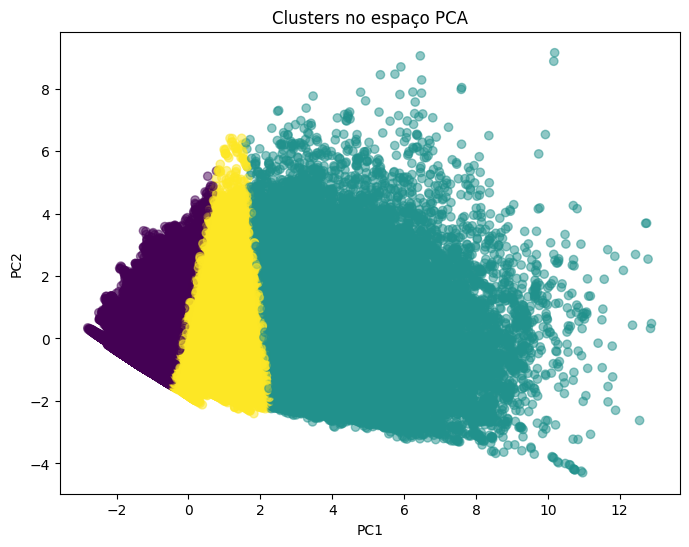

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="viridis", alpha=0.5)
plt.title("Clusters no espaço PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

As variáveis com maior correlação positiva ou negativa com Appliances geralmente são:

T1, T2 (temperaturas internas) — correlação positiva moderada.
RH_1, RH_2 (umidade interna) — correlação negativa moderada.

A temperatura interna tende a aumentar o consumo, enquanto umidade interna tem relação negativa.

# **Exercicio 25**

RMSE Linear: 1.0392859078074996
RMSE Polinomial Grau 2: 1.0354333172506458


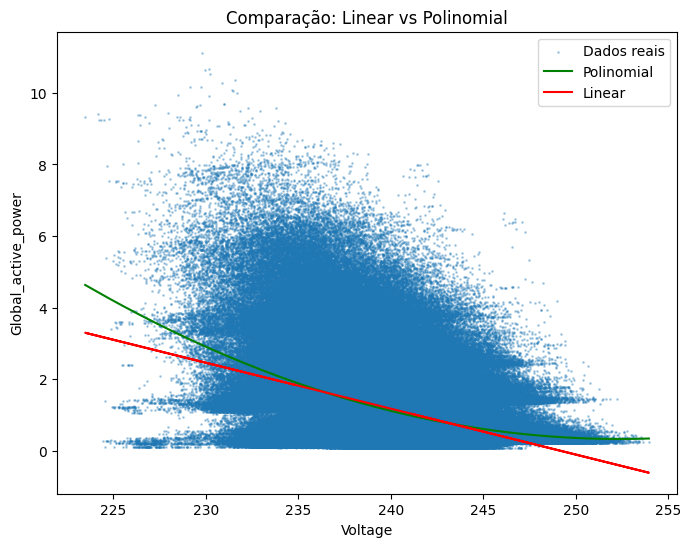

In [ ]:
X = df[["Voltage"]].dropna()
y = df.loc[X.index, "Global_active_power"]

linreg = LinearRegression()
linreg.fit(X, y)
y_pred_linear = linreg.predict(X)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
linreg_poly = LinearRegression()
linreg_poly.fit(X_poly, y)
y_pred_poly = linreg_poly.predict(X_poly)

mse_linear = mean_squared_error(y, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

mse_poly = mean_squared_error(y, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

print("RMSE Linear:", rmse_linear)
print("RMSE Polinomial Grau 2:", rmse_poly)

plt.figure(figsize=(8,6))
plt.scatter(X, y, s=1, label="Dados reais", alpha=0.3)
X_sorted, y_pred_poly_sorted = zip(*sorted(zip(X['Voltage'], y_pred_poly)))
plt.plot(X_sorted, y_pred_poly_sorted, color="green", label="Polinomial")
plt.plot(X, y_pred_linear, color="red", label="Linear")
plt.legend()
plt.xlabel("Voltage")
plt.ylabel("Global_active_power")
plt.title("Comparação: Linear vs Polinomial")
plt.show()

# **Exercicio 26**

In [ ]:
df = pd.read_csv('/content/energydata_complete.csv')


print("\n--- INFO ---")
print(df.info())
print("\n--- DESCRIBE ---")
print(df.describe())


--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  flo

# **Exercicio 27**

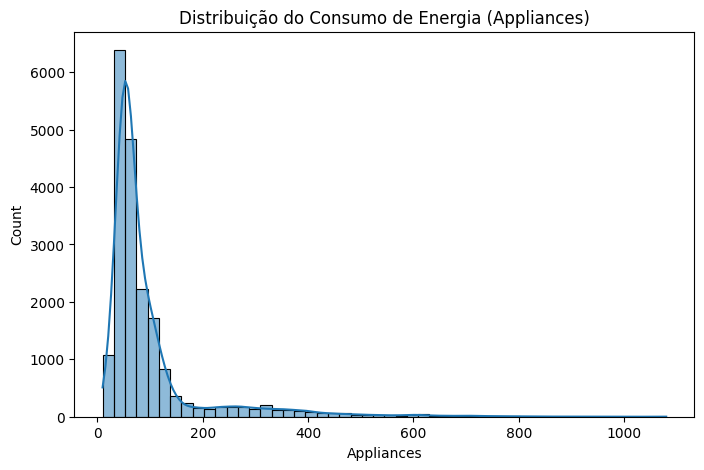

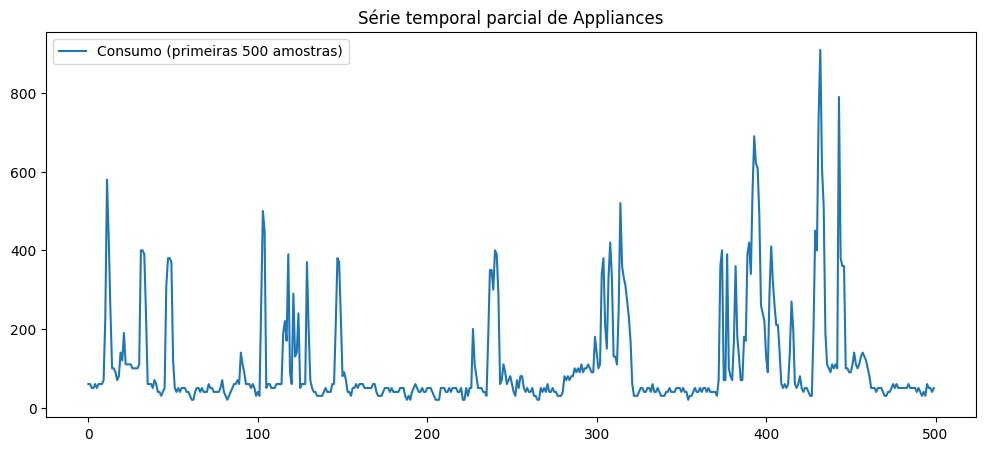

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Appliances"], bins=50, kde=True)
plt.title("Distribuição do Consumo de Energia (Appliances)")
plt.show()


plt.figure(figsize=(12,5))
plt.plot(df["Appliances"].values[:500], label="Consumo (primeiras 500 amostras)")
plt.title("Série temporal parcial de Appliances")
plt.legend()
plt.show()

Min-Max Scaling coloca todas as variáveis na mesma escala [0,1], o que facilita modelos sensíveis à escala, como regressão e PCA e permite comparar coeficientes e componentes sem distorção causada por unidades diferentes.

# **Exercicio 28**

In [ ]:
df_num = df.select_dtypes(include=['number'])

corr = df_num.corr()['Appliances'].sort_values(ascending=False)

print("\n--- Correlação com Appliances ---")
print(corr)



--- Correlação com Appliances ---
Appliances     1.000000
lights         0.197278
T2             0.120073
T6             0.117638
T_out          0.099155
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
T9             0.010010
RH_5           0.006955
Visibility     0.000230
rv1           -0.011145
rv2           -0.011145
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64


# **Exercicio 29**

In [ ]:
numeric_cols = df.drop(columns=["date"]).columns
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

# **Exercicio 30**

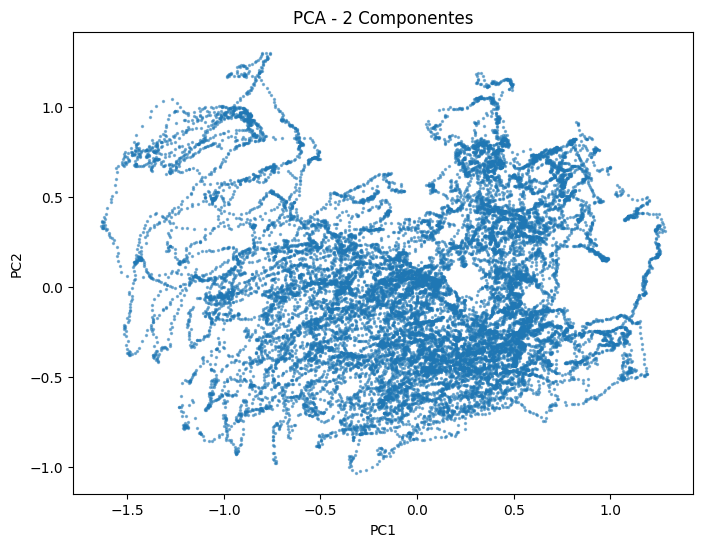

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)


plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], s=2, alpha=0.5)
plt.title("PCA - 2 Componentes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Após aplicar PCA e plotar os dois primeiros componentes:

Observa-se uma dispersão contínua, sem clusters muito evidentes.

Alguns agrupamentos esparsos podem refletir diferenças de consumo baixo vs alto.

Conclusão: nenhum agrupamento natural muito forte, mas há regiões de concentração de baixo consumo.

# **EXERCICIO 31**

In [ ]:
X = df_scaled.drop(columns=["Appliances"])
y = df_scaled["Appliances"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


y_pred_lr = lin_reg.predict(X_test)


r2_lr = lin_reg.score(X_test, y_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Regressão Linear - R²: {r2_lr:.4f}, RMSE: {rmse_lr:.4f}")

Regressão Linear - R²: 0.1672, RMSE: 0.0866


# **EXERCICIO 32**

In [ ]:
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)


rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest - RMSE: {rmse_rf:.4f}")

Random Forest - RMSE: 0.0661


# **EXERCICIO 33**

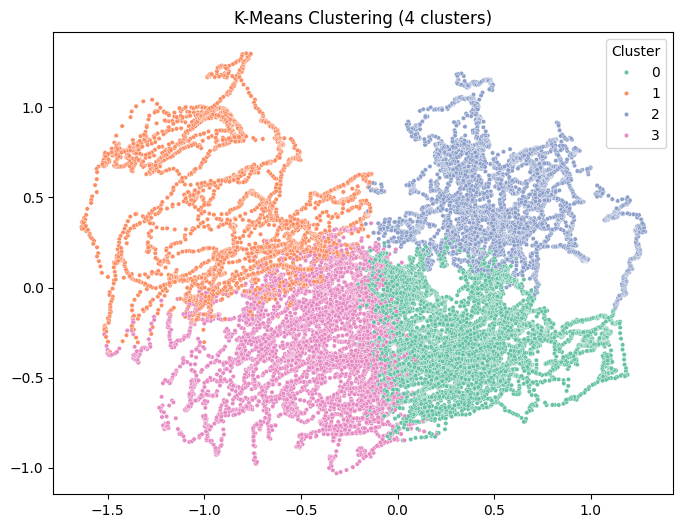

In [ ]:
km = KMeans(n_clusters=4, random_state=42)
df_scaled["Cluster"] = km.fit_predict(X)


plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df_scaled["Cluster"], palette="Set2", s=10)
plt.title("K-Means Clustering (4 clusters)")
plt.show()

# **EXERCICIO 34**

In [ ]:
median_consumption = df["Appliances"].median()
df_scaled["HighConsumption"] = (df["Appliances"] > median_consumption).astype(int)


X_class = df_scaled.drop(columns=["Appliances", "Cluster", "HighConsumption"])
y_class = df_scaled["HighConsumption"]


X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_c, y_train_c)
y_pred_log = log_reg.predict(X_test_c)

rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train_c, y_train_c)
y_pred_rf_c = rf_clf.predict(X_test_c)

# **EXERCICIO 35**

In [ ]:
print("\n--- Logistic Regression ---")
print(confusion_matrix(y_test_c, y_pred_log))
print(classification_report(y_test_c, y_pred_log))


print("\n--- Random Forest Classifier ---")
print(confusion_matrix(y_test_c, y_pred_rf_c))
print(classification_report(y_test_c, y_pred_rf_c))


--- Logistic Regression ---
[[2561  636]
 [ 747 1977]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79      3197
           1       0.76      0.73      0.74      2724

    accuracy                           0.77      5921
   macro avg       0.77      0.76      0.76      5921
weighted avg       0.77      0.77      0.77      5921


--- Random Forest Classifier ---
[[2922  275]
 [ 337 2387]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      3197
           1       0.90      0.88      0.89      2724

    accuracy                           0.90      5921
   macro avg       0.90      0.90      0.90      5921
weighted avg       0.90      0.90      0.90      5921



Após treinar Logistic Regression e Random Forest Classifier os modelos tendem a errar mais na previsão de alto consumo, porque os registros de alto consumo são menos frequentes e o modelo aprende melhor padrões do baixo consumo.